# Numerical Recipes Workshop 4
For the week of 14-18 October, 2019

This notebook will cover some basics of ODE solving and advanced plotting techniques.

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Solving ODEs
In this activity, you will implement and experiment with some ODE integration methods for initial value problems. You will then learn to use SciPy's [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) function for doing this more generally.

In each case, you will solve an ODE of the form:

$
\begin{align}
\frac{dy}{dt} = f(t, y)
\end{align}
$

A straightforward way to code this is to implement a Python function for $f(t, y)$. We will do this below for 

$
\begin{align}
\frac{dy}{dt} = cos(t)
\end{align}
$

### Define the function
For reasons that will be clear later, the order of arguments should be $t$ first and $y$ second.

In [3]:
def dy_dt(t, y):
    return np.cos(t)

### Define a step size
We will use $h$ to denote the step size. We will integrate from $t$ = 0 to 20. The `ts` and `ys` arrays will store the values of $t$ and the solution.

In [4]:
h = 0.25
ts = np.arange(0, 20+h, h)
ys = np.empty(ts.size)

### Direct Euler

$
\begin{align}
y(t+h) = y(t) + h f(t, y)
\end{align}
$

This becomes:

$
\begin{align}
y_{n+1} = y_{n} + h f(t_{n}, y_{n})
\end{align}
$


In [5]:
# Set the inital value
ys[0] = 0.5

# Now integrate
for i in range(1, ts.size):
    tn = ts[i-1]
    yn = ys[i-1]
    ys[i] = yn + h * dy_dt(tn, yn)

Text(0, 0.5, 'y')

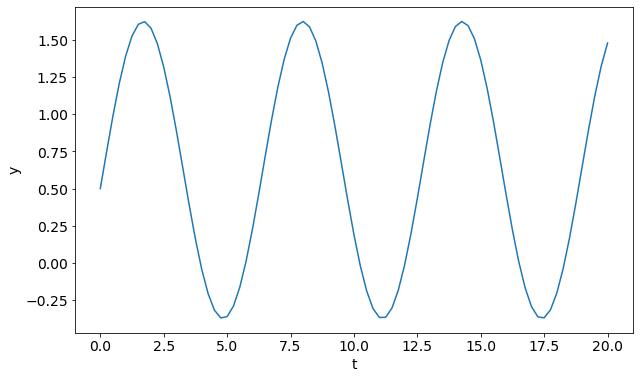

In [6]:
plt.plot(ts, ys)
plt.xlabel('t')
plt.ylabel('y')

### Calculate the error
The above problem has the analytic solution

$
\begin{align}
y(t) = sin(t) + 0.5
\end{align}
$

We will compare to that to measure the error.

In [7]:
yexact = np.sin(ts) + 0.5

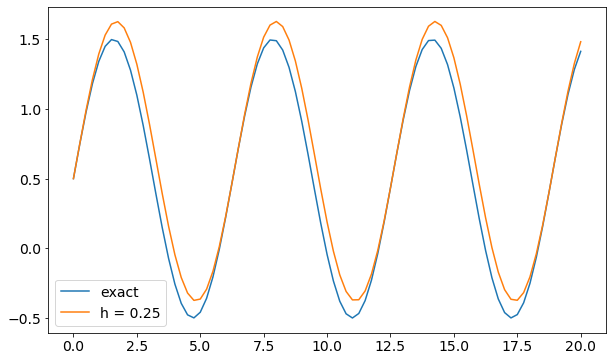

In [8]:
plt.plot(ts, yexact, label='exact')
plt.plot(ts, ys, label=f'h = {h}')
plt.legend(loc='best')

0.2501086785085613


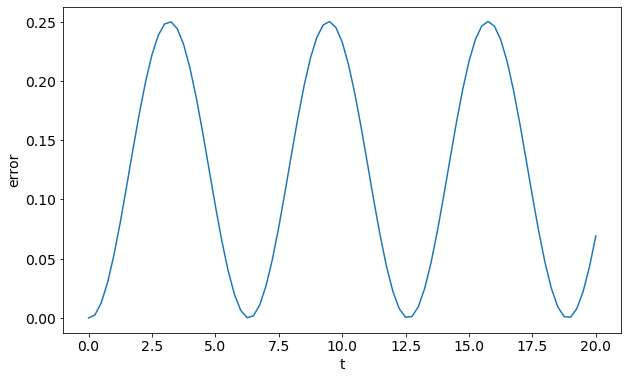

In [9]:
err = np.abs(yexact - ys)
err_max = np.amax(err)
plt.plot(ts, err)
plt.xlabel('t')
plt.ylabel('error')
print(err_max)

Text(0, 0.5, 'error')

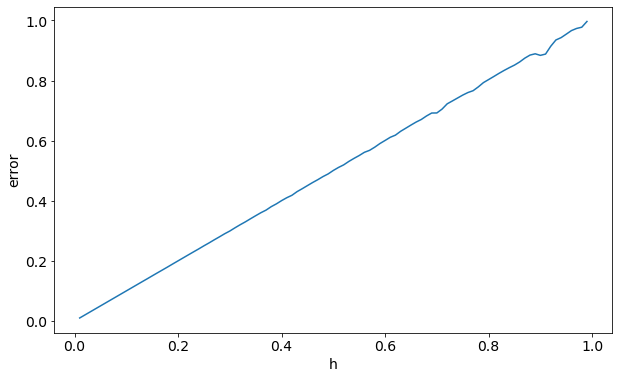

In [10]:
hs = np.arange(0.01, 1.0, 0.01)
err_array = np.array([])

for h in hs:
    ts = np.arange(0, 20+h, h)
    ys = np.empty(ts.size)
    
    # Set the inital value
    ys[0] = 0.5
    
    for i in range(1, ts.size):
        tn = ts[i-1]
        yn = ys[i-1]
        ys[i] = yn + h * dy_dt(tn, yn)
        
    yexact = np.sin(ts) + 0.5
    
    err = np.abs(yexact - ys)
    
    err_array = np.append(err_array, np.amax(err))

plt.plot(hs, err_array)
plt.xlabel('h')
plt.ylabel('error')

Record $h$ and the maximum value of the error and make a plot of error vs. step size. How does the error change with step size for the Direct Euler method?

### 2nd Order Runga-Kutta

$
\begin{align}
k_{1} = h f(t, y),\\
\end{align}
$

$
\begin{align}
k_{2} = h f(t + \frac{h}{2}, y + \frac{k_{1}}{2})
\end{align}
$

$
\begin{align}
y(t+h) = y(t) + k_{2}
\end{align}
$


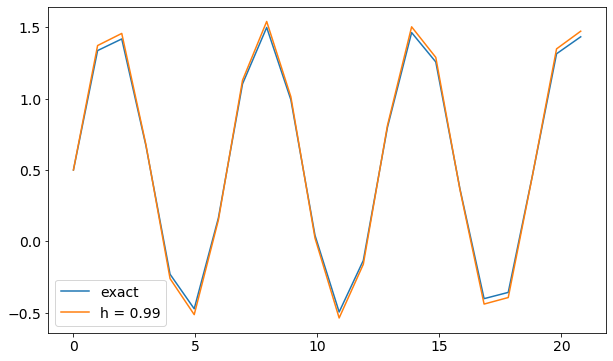

In [11]:
hs = np.arange(0.01, 1.0, 0.01)
err_array_RK2 = np.array([])

for h in hs:
    ts = np.arange(0, 20+h, h)
    ys = np.empty(ts.size)
    
    # Set the inital value
    ys[0] = 0.5
    
    # Now integrate
    for i in range(1, ts.size):
        tn = ts[i-1]
        yn = ys[i-1]
        k1 = h * dy_dt(tn, yn)
        k2 = h * dy_dt(tn + h/2, yn + k1/2)
        ys[i] = yn + k2
        
    yexact = np.sin(ts) + 0.5
    
    err = np.abs(yexact - ys)
    
    err_array_RK2 = np.append(err_array_RK2, np.amax(err))

plt.plot(ts, yexact, label='exact')
plt.plot(ts, ys, label=f'h = {h}')
plt.legend(loc='best')

Text(0, 0.5, 'error - RK2')

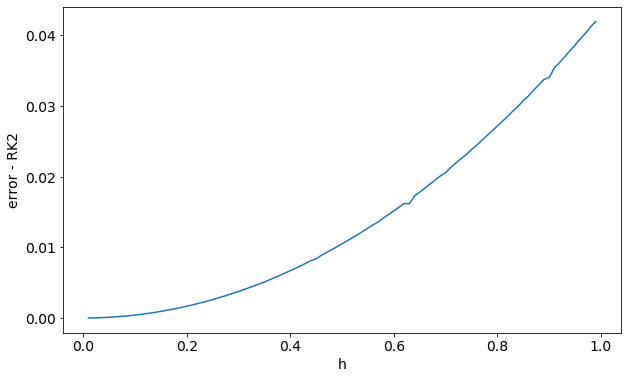

In [12]:
plt.plot(hs, err_array_RK2)
plt.xlabel('h')
plt.ylabel('error - RK2')

Plot the integrated and analytic solutions and calculate the error as a function of $h$. Compare this with the Direct Euler method.

### 4th Order Rung-Kutta
$
\begin{align}
k_{1} = h f(t, y),\\
\end{align}
$

$
\begin{align}
k_{2} = h f(t + \frac{h}{2}, y + \frac{k_{1}}{2})
\end{align}
$

$
\begin{align}
k_{3} = h f(t + \frac{h}{2}, y + \frac{k_{2}}{2})
\end{align}
$

$
\begin{align}
k_{4} = h f(t + h, y + k_{3})
\end{align}
$

$
\begin{align}
y(t+h) = y(t) + \frac{k_{1}}{6} + \frac{k_{2}}{3} + \frac{k_{3}}{3} + \frac{k_{4}}{6}
\end{align}
$

Implement this method yourself for the same initial value problem. Make the same plots and compare the error with the DE and RK23 methods.

In [13]:
hs = np.arange(0.01, 1.0, 0.01)
err_array_RK4 = np.array([])

for h in hs:
    ts = np.arange(0, 20+h, h)
    ys = np.empty(ts.size)
    
    # Set the inital value
    ys[0] = 0.5
    
    # Now integrate
    for i in range(1, ts.size):
        tn = ts[i-1]
        yn = ys[i-1]
        k1 = h * dy_dt(tn, yn)
        k2 = h * dy_dt(tn + h/2, yn + k1/2)
        k3 = h * dy_dt(tn + h/2, yn + k2/2)
        k4 = h * dy_dt(tn + h, yn + k3)
        
        ys[i] = yn + k1/6 + k2/3 + k3/3 + k4/6
        
    yexact = np.sin(ts) + 0.5
    
    err = np.abs(yexact - ys)
    
    err_array_RK4 = np.append(err_array_RK4, np.amax(err))

Text(0, 0.5, 'error - RK4')

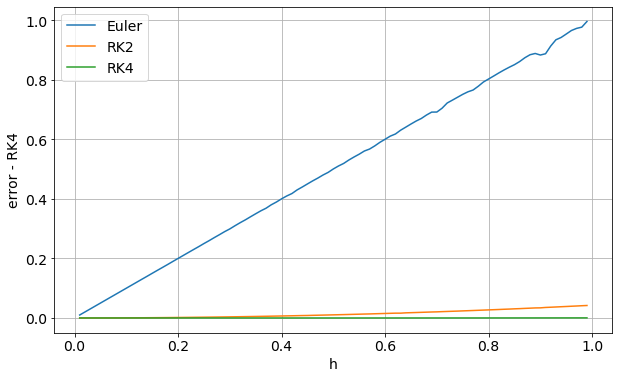

In [14]:
plt.plot(hs, err_array, label = 'Euler')
plt.plot(hs, err_array_RK2, label = 'RK2')
plt.plot(hs, err_array_RK4, label = 'RK4')
plt.legend()
plt.grid()
plt.xlabel('h')
plt.ylabel('error - RK4')

### The SciPy `solve_ivp` function
SciPy's [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) can solve IVPs using a variety of methods. The user must provide a function that accepts $t, y$ in that order as well an initial value, and range over which to solve.

In [15]:
from scipy.integrate import solve_ivp

In [16]:
h = 0.05
ts = np.arange(0, 50+h, h)
sol_range = (ts[0], ts[-1])
y0 = 1

In [17]:
sol = solve_ivp(dy_dt, sol_range, [y0], t_eval=ts, method='RK45')

Text(0, 0.5, 'y')

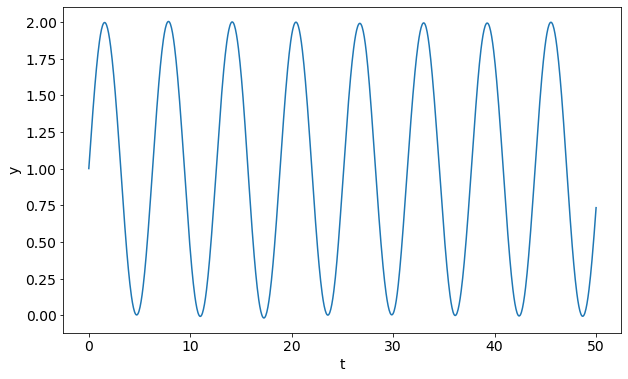

In [18]:
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y')

Now solve the following IVP:

$
\begin{align}
\large
\frac{dy}{dt} = y\ cos(t),\\
\end{align}
$

$
\begin{align}
\large
y(0) = 1
\end{align}
$


This has the analytic solution:

$
\begin{align}
\large
y(t) = e^{sin(t)}
\end{align}
$

Try a few different methods using the `method` and `max_step` keywords to experiment with different solvers and step sizes.

Text(0, 0.5, 'y - solution to dy_dt_2')

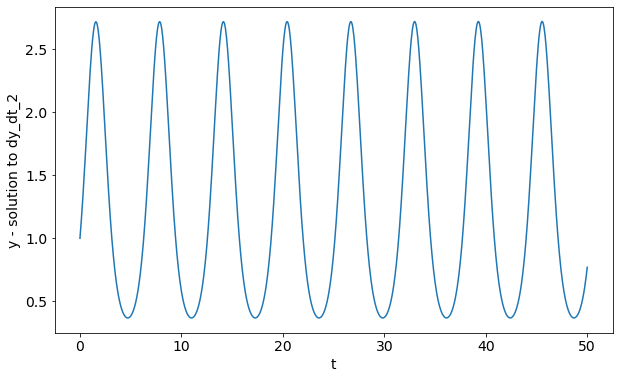

In [19]:
def dy_dt_2(t,y):
    return y*np.cos(t)
h = 0.05
ts = np.arange(0, 50+h, h)
sol_range = (ts[0], ts[-1])
y0 = 1
yexact = np.exp(np.sin(ts))

sol = solve_ivp(dy_dt_2, sol_range, [y0], t_eval=ts, method='RK45')

plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y - solution to dy_dt_2')


## Solving a sytem of equations
The `solve_ivp` function can solve a system of ODEs just as easily as a single ODE. This is done by creating a function for `dy/dt` that returns multiple values.

Consider the problem of parabolic motion, i.e., a projectile launched into the air with an initial velocity, feeling only the force of gravity (no air resistance). We can define the follow system of equations:

$
\begin{align}
\large
\frac{dx}{dt} = v_{x}
\end{align}
$

$
\begin{align}
\large
\frac{dy}{dt} = v_{y}
\end{align}
$

$
\begin{align}
\large
\frac{dv_{x}}{dt} = 0
\end{align}
$

$
\begin{align}
\large
\frac{dv_{y}}{dt} = -g
\end{align}
$

We can then create a function to give to `solve_ivp` as follows:

In [5]:
g = 9.80665 # m/s^2
def projectile_motion(t, f):
    """
    f0 = dx/dt  = vx
    f1 = dy/dt  = vy
    f2 = dvx/dt = 0
    f3 = dvy/dt = - g / m
    """
    
    vals = np.zeros(4)
    vals[0] = f[2]
    vals[1] = f[3]
    vals[2] = 0
    vals[3] = - g

    return vals

We must provide an initial value for each of the equations. Assume a starting position of (0, 0) with some initial velocity, $v_{i}$, with an angle, $\theta$, with the ground.

In [6]:
vi = 100 # m/s
theta = 30 * np.pi / 180 # 30 degrees
vx = vi * np.cos(theta)
vy = vi * np.sin(theta)
fi = np.array([0, 0, vx, vy])

Additionally, we can provide a function to determine when the projectile hits the ground. The function below returns the value of the $y$ coordinate. A root-finding method will then determine the time when this function returns 0, i.e., the ball is on the ground.

The `terminal` attribute will instruct the solver to end there, even if the full time interval has not been evaluated. The `direction` attribute can be used to filter out solutions we don't want, i.e., the initial value.

In [1]:
def object_lands(t, f):
    return f[1]
object_lands.terminal = True
object_lands.direction = -1

In [2]:
# Set t values
ts = np.linspace(0, 20, 401)
trange = (ts[0], ts[-1])

NameError: name 'np' is not defined

In [ ]:
# Solve!
sol = solve_ivp(projectile_motion, trange, fi, events=(object_lands), t_eval=ts, dense_output=True)

Now, plot x position vs. y position. We could also plot $v_{x}$, $v_{y}$, or $t$.

In [10]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x [m]')
plt.ylabel('y [m]')

NameError: name 'sol' is not defined

## 3D and Advanced Plotting
Lines and points are great, but often insufficient for visualizing multi-dimensional data. Matplotlib provides a [3D plotting toolkit](https://matplotlib.org/3.1.1/tutorials/toolkits/mplot3d.html) for a variety of 3D plots.

Let's return to the dust temperature example from Workshop 3. If you are not familiar with this, go back to the Workshop 3 notebook and read the short text on computing the temperature of interstellar dust grains.

The functions for calculating the dust temperature are given below. Previously, you solved for $T_{dust}$ for a range of densities ($n_{H}$) and a single gas temperature ($T_{gas}$). Now, let's do the same exercise for a range of gas temperatures as well. The code is given below.

In [11]:
mh = 1.673735e-24 # g
# Stefan-Boltzmann constant
sigma_b = 5.670373e-5 # erg cm^−2 s^−1 K^−4

def gas_grain(Tgas):
    """
    Return gas/grain heat transfer rate coefficient.
    """

    grain_coef = 1.2e-31 * 1.0e3**-0.5 / mh
    gasgra = grain_coef * Tgas**0.5 * \
        (1.0 - (0.8 * np.exp(-75.0 / Tgas)))
    return gasgra

def kappa_grain(Tdust):
    """
    Return grain mean opacity.
    """

    kgr1   = 4.0e-4
    kgr200 = 16.0
    T_subl = 1500.

    Tdust = np.asarray(Tdust)
    kgr = np.zeros(Tdust.size)

    f1 = Tdust < 200
    if f1.any():
        kgr[f1] = kgr1 * Tdust[f1]**2

    kgr[(Tdust >= 200) & (Tdust < T_subl)] = kgr200

    f2 = Tdust >= T_subl
    if f2.any():
        kgr[f2] = kgr200 * (Tdust[f2] / T_subl)**-12
    
    return kgr

def gamma_isrf():
    """
    Interstellar radiation field heating rate coefficient.
    """

    return 4.154682e-22 / mh

def gamma_grain(Tdust, Tgas, nh, isrf=1.7, z=0):
    """
    Return the grain heating rate.
    
    Parameters
    ----------
    
    Tdust : float
        dust temperature in K
    Tgas : float
        gas temperature in K
    nh : float
        Hydrogen number density in cm^-3
    isrf : float, optional
        interstellar radiation field strengh in Habing units
        default: 1.7 (typical for local interstellar medium)
    z : float, optional
        current redshift, used to set the temperature of the
        Cosmic Microwave Background.
        default: 0
    """

    TCMB = 2.73 * (1 + z)
    my_isrf = isrf * gamma_isrf()

    return my_isrf + \
        4 * sigma_b * kappa_grain(Tdust) * (TCMB**4 - Tdust**4) + \
        (gas_grain(Tgas) * nh * (Tgas - Tdust))

In [12]:
import scipy.optimize as opt

In [13]:
# Create arrays of Tgas and nH
Tgas = np.logspace(1, 3.5, 61)
nH = np.logspace(0, 13, 131)

Now, calculate the dust temperature for all values of $n_{H}$ and $T_{dust}$. This will take a minute.

In [14]:
Tdust = np.empty((nH.size, Tgas.size))
for i in range(nH.size):
    for j in range(Tgas.size):
        Tdust[i,j] = opt.brentq(gamma_grain, 1, 1e4, args=(Tgas[j], nH[i]))

### Plotting $T_{dust}$ as a surface

The dust temperature can be visualized in 3D as a surface in the space ($n_{H}$, $T_{gas}$). In order to give the surface some texture for a more intuitive appearance, we can also apply a colormap to color the surface according to the heigh in the z axis.

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

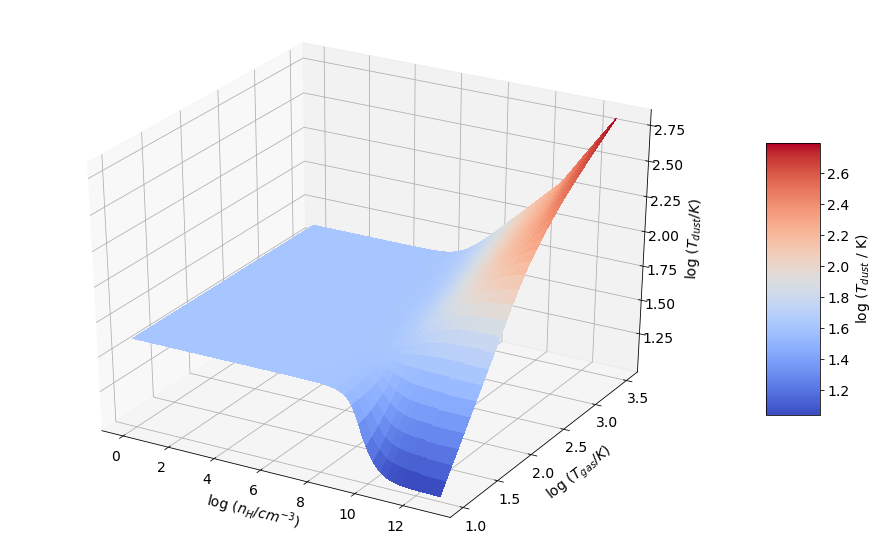

In [16]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

# Make data.
# Put data in log-space to view the large dynamic range.
X, Y = np.meshgrid(np.log10(nH), np.log10(Tgas))

# Note, we transpose the Tdust array.
Z = np.log10(Tdust.T)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.xaxis.set_label_text('log ($n_{H} / cm^{-3}$)')
ax.xaxis.labelpad = 10
ax.yaxis.set_label_text('log ($T_{gas} / K$)')
ax.yaxis.labelpad = 10
ax.zaxis.set_label_text('log ($T_{dust} / K$)')
ax.zaxis.labelpad = 10

# Add a color bar which maps values to colors.
cb = fig.colorbar(surf, shrink=0.5, aspect=5, label='log ($T_{dust}$ / K)')
plt.show()

### Plotting $T_{dust}$ as a color mesh
There are obvious disadvantages to plotting $T_{dust}$ as a surface, i.e., not all points can be seen or apparent values can depend somewhat on perspective. Since the z height and the color are showing the same information, we can eliminate the height component and view the above plot from the top down using the [pcolormesh](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib.pyplot.pcolormesh) from matplotlib.

Text(0, 0.5, 'log ($T_{gas} / K$)')

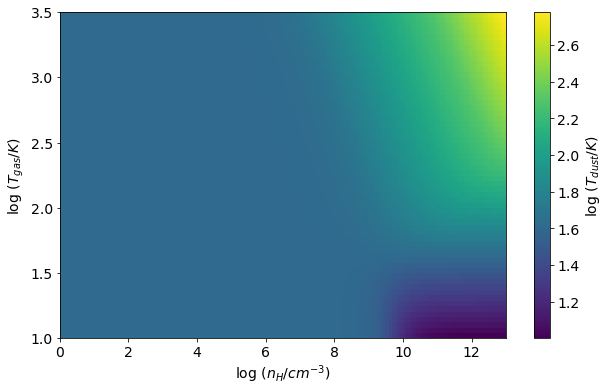

In [44]:
plt.pcolormesh(X, Y, Z, cmap=cm.viridis) # change to cmap=cm.coolwarm to see same colormap as above
plt.colorbar(label='log ($T_{dust} / K$)')
plt.xlabel('log ($n_{H} / cm^{-3}$)')
plt.ylabel('log ($T_{gas} / K$)')

## Baseball: the objectively most interesting spectator sport
Baseball is undergoing a "launch angle revolution." Players have been traditionally coached to hit the ball low to the ground in order to get "line-drive" hits and to avoid hitting the ball into the air where it can be easily caught for an out. However, with the advent of technology to measure the speed of the batted ball off the bat (known as "exit-velocity"), analysis showed that many players hit the ball with enough power to be hitting home runs (the ball is hit out of the park) regularly. Thus, players are now adjusting their swings to hit the ball with a more upward trajectory.

Batted baseballs experience enough air resistance to alter their paths from a simple parabola. To compute the distance traveled by a baseball, we must consider the drag force, which is defined as

$
\begin{align}
F_{D} = \frac{1}{2} C_{D} A \rho v^{2},
\end{align}
$

where $C_{D}$ is the drag coefficient, $A$ is the cross-sectional area of the ball, $\rho$ is the density of air, and $v$ is the velocity of the ball.

Add the drag force to the projectile motion problem to compute the travel distance a batted ball for a given exit velocity and launch angle. The relevant constants are given below.

In [45]:
# baseballs
m = 0.145 # kg
c = 23.2 # cm
r = c / 2 / np.pi
A = np.pi * (r)**2 / 10000 # m^2
Cd = 0.346

In [67]:
# Earth-related constants
rhoE = 1.19657921 # kg/m^3
g = 9.80665 # m/s^s

In [69]:
def baseball_flight(t, f):
    """
    f0 = dx/dt  = vx
    f1 = dy/dt  = vy
    f2 = dvx/dt = F_x / m
    f3 = dvy/dt = F_y / m - g 
    """
    v_mag = np.sqrt(np.power(f[2],2)*np.power(f[3],2))
    Fx_hat = (-1/v_mag) * (f[2])
    Fy_hat = (-1/v_mag) * (f[3])
    F_x = .5 * Cd * A * rhoE * v_mag *Fx_hat
    F_y = .5 * Cd * A * rhoE * v_mag *Fy_hat
    
    vals = np.zeros(4)
    vals[0] = f[2]
    vals[1] = f[3]
    vals[2] = F_x / m
    vals[3] = F_y / m - g
    
    return vals

### Initial values
The average well-hit ball has an exit velocity of about 100 miles/hour, or about 45 m/s. Assume a launch angle of 30 degrees and that the ball is hit by the batter from a height of 1 m.

In [70]:
vi = 45 # m/s
theta = 30 * np.pi / 180 # 30 degrees
vx = vi * np.cos(theta)
vy = vi * np.sin(theta)
fi = np.array([0, 1, vx, vy])

### Is it a home run?
The average outfield wall is about 100 m from the batter and about 2 m high. A ball must reach at least this point to be considered a homerun.

Baseballs will have a total flight time of less than 10 seconds.

Implement an event function to determine when the ball has returned to a height of 2 m.

In [72]:
def ball_lands(t, f):
        return f[1]
    
ball_lands.terminal = True
ball_lands.direction = -1

In [73]:
ts = np.linspace(0, 10, 201)
sol = solve_ivp(baseball_flight, (0, 10), fi, events=(ball_lands), t_eval=ts, dense_output=True)

Plot the trajectory of the batted ball. An outfield wall has been provided for you.

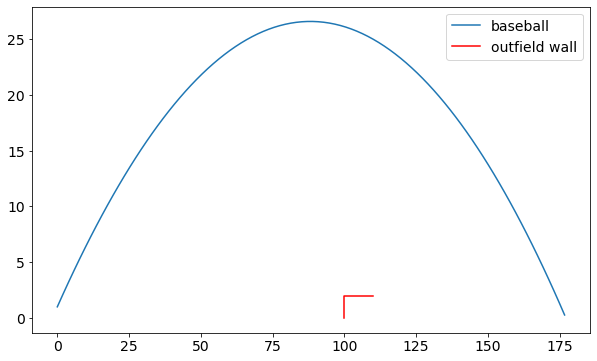

In [74]:
plt.plot(sol.y[0], sol.y[1], label='baseball')
# Outfield wall
plt.plot([100, 100, 110], [0, 2, 2], label='outfield wall', color='red')
plt.legend(loc='best')

### Was it a homerun?
The `ball_lands` event will record the time for the ball to return to a height of 2 m. The `sol.sol` command can then be used to determine the values for each of the equations in the series at the given time.

In [ ]:
print (f'Flight time: {sol.t_events[0][0]} s.')
value = sol.sol(sol.t_events[0])
print (f'Distance: {value[0][0]} m.')

### Optimal launch angle
Plot the distance traveled in the x direction as a function of exit velocity and launch angle for exit velocities from 90 to 115 mph (make sure to convert to m/s). What is the optimal launch angle? What is the minimum exit velocity needed to hit a home run?

### Chicago: the windy city
Wrigley Field, home of the Chicago Cubs, is well-known for fluctuating significantly between being friendly to hitters or pitchers, depending on the direction of the wind. Experiment with adding a 15 mph wind heading either in (against the direction of the batted ball) or out to see how this changes things for the problem above.